 **Loading the Data (CSV Files)**
We'll start by loading the two CSV files into pandas DataFrames.

In [ ]:

import pandas as pd

# Load the regular season and playoff data (semicolon-separated and encoding handled)
regular_season_df = pd.read_csv('/content/2023-2024 NBA Player Stats - Regular.csv', sep=';', encoding='latin1')
playoffs_df = pd.read_csv('/content/2023-2024 NBA Player Stats - Playoffs.csv', sep=';', encoding='latin1')

# Display the first few rows of each dataset
print("Regular Season Stats:")
display(regular_season_df.head())

print("\nPlayoff Stats:")
playoffs_df.head()




FileNotFoundError: [Errno 2] No such file or directory: '/content/2023-2024 NBA Player Stats - Regular.csv'

In [ ]:
print("\nPlayoff Stats:")
playoffs_df.head()

**Exploring the Data**

In [ ]:
# Get basic information about the datasets
print("Regular Season Data Info:")
regular_season_df.info()

print("\nPlayoff Data Info:")
playoffs_df.info()




In [ ]:
# Check for missing values
print("\nMissing Values in Regular Season Data:")
regular_season_df.isnull().sum()


In [ ]:

print("\nMissing Values in Playoff Data:")
print(playoffs_df.isnull().sum())


In [ ]:

# Get statistical summaries of the data
print("\nStatistical Summary (Regular Season):")
#print(regular_season_df.describe())
regular_season_df.describe()

In [ ]:

print("\nStatistical Summary (Playoffs):")
playoffs_df.describe()

**Cleaning some Data**

In [ ]:
# Dropping any rows with missing values (if necessary)
regular_season_df = regular_season_df.dropna()
playoffs_df = playoffs_df.dropna()

# Rename columns if needed (for easier access)
regular_season_df.rename(columns={'Tm': 'Team','PTS': 'Points', 'TRB': 'Rebounds', 'AST': 'Assists'}, inplace=True)
playoffs_df.rename(columns={'Tm': 'Team','PTS': 'Points', 'TRB': 'Rebounds', 'AST': 'Assists'}, inplace=True)

print("Updated Regular Season Columns:")
print(regular_season_df.columns)

print("\nUpdated Playoff Columns:")
print(playoffs_df.columns)


**Data Analysis & Manipulation**

In [ ]:
# Top 10 players with the most points in the regular season
top_scorers_regular = regular_season_df[['Player', 'Points']].sort_values(by='Points', ascending=False).head(10)
print("Top 10 Regular Season Scorers:")
top_scorers_regular

# Top 10 players with the most points in the playoffs
top_scorers_playoffs = playoffs_df[['Player', 'Points']].sort_values(by='Points', ascending=False).head(10)
print("Top 10 Playoff Scorers:")
top_scorers_playoffs

# Grouping the data by 'Team' and calculating the average stats for each team
team_avg_stats_regular = regular_season_df.groupby('Team')[['Points', 'Rebounds', 'Assists']].mean().reset_index()
print("\nAverage Team Stats (Regular Season):")
team_avg_stats_regular

# Similarly for playoffs
team_avg_stats_playoffs = playoffs_df.groupby('Team')[['Points', 'Rebounds', 'Assists']].mean().reset_index()
print("\nAverage Team Stats (Playoffs):")
team_avg_stats_playoffs


In [ ]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Plot a bar chart of the top 10 regular season scorers
plt.figure(figsize=(10,6))
sns.barplot(x='Points', y='Player', data=top_scorers_regular)
plt.title('Top 10 Regular Season Scorers')
plt.show()

# Plot a bar chart of the top 10 playoff scorers
plt.figure(figsize=(10,6))
sns.barplot(x='Points', y='Player', data=top_scorers_playoffs)
plt.title('Top 10 Playoff Scorers')
plt.show()

# Plot a comparison of average team stats (Points, Rebounds, Assists) between regular season and playoffs
plt.figure(figsize=(12,8))
team_avg_stats = pd.merge(team_avg_stats_regular, team_avg_stats_playoffs, on='Team', suffixes=('_Regular', '_Playoffs'))

# Plot average points for regular season and playoffs
sns.barplot(x='Points_Regular', y='Team', data=team_avg_stats, color="b", label="Regular Season")
sns.barplot(x='Points_Playoffs', y='Team', data=team_avg_stats, color="r", label="Playoffs")
plt.title('Average Points per Team: Regular Season vs Playoffs')
plt.legend()
plt.show()


**Exercises**
Exercise 1: Top 10 Rebounders

Write code to display the top 10 players with the most rebounds in both the regular season and playoffs.


In [23]:

top_rebounders_regular = regular_season_df[['Player', 'Rebounds']].sort_values(by='Rebounds', ascending=False).head(10)
print("Top 10 Regular Season Rebounders:")
display(top_rebounders_regular)

top_rebounders_playoffs = playoffs_df[['Player', 'Rebounds']].sort_values(by='Rebounds', ascending=False).head(10)
print("Top 10 Playoff Rebounders:")
display(top_rebounders_playoffs)


Top 10 Regular Season Rebounders:


,Player,Rebounds
577,Domantas Sabonis,13.7
241,Rudy Gobert,12.9
155,Anthony Davis,12.6
340,Nikola Joki?,12.4
181,Jalen Duren,11.6
14,Giannis Antetokounmpo,11.5
22,Deandre Ayton,11.1
492,Jusuf Nurki?,11.0
186,Joel Embiid,11.0
121,Clint Capela,10.6


Top 10 Playoff Rebounders:


,Player,Rebounds
37,Anthony Davis,15.6
4,Jarrett Allen,13.8
97,Nikola Joki?,13.4
69,Josh Hart,11.5
157,Bobby Portis,11.3
193,Jonas Valan?i?nas,11.0
46,Joel Embiid,10.8
57,Rudy Gobert,9.8
183,Jayson Tatum,9.7
42,Luka Don?i?,9.5


**Exercise 2: Assists Leader by Team**

Group the data by team and calculate which player on each team has the most assists for both the regular season and playoffs

hint -- inmax() will return the maximum value of a series that you grab


In [22]:

assists_leader_regular = regular_season_df.loc[regular_season_df.groupby('Team')['Assists'].idxmax()]
print("Regular Season Assists Leader by Team:")
display(assists_leader_regular[['Team', 'Player', 'Assists']])


assists_leader_playoffs = playoffs_df.loc[playoffs_df.groupby('Team')['Assists'].idxmax()]
print("\nPlayoffs Assists Leader by Team:")
display(assists_leader_playoffs[['Team', 'Player', 'Assists']])


Regular Season Assists Leader by Team:


,Team,Player,Assists
731,ATL,Trae Young,10.8
694,BOS,Derrick White,5.2
168,BRK,Spencer Dinwiddie,6.0
159,CHI,DeMar DeRozan,5.3
30,CHO,LaMelo Ball,8.0
222,CLE,Darius Garland,6.5
171,DAL,Luka Don?i?,9.8
340,DEN,Nikola Joki?,9.0
149,DET,Cade Cunningham,7.5
509,GSW,Chris Paul,6.8



Playoffs Assists Leader by Team:


,Team,Player,Assists
183,BOS,Jayson Tatum,6.3
52,CLE,Darius Garland,5.8
42,DAL,Luka Don?i?,8.1
97,DEN,Nikola Joki?,8.7
63,IND,Tyrese Haliburton,8.2
65,LAC,James Harden,8.0
92,LAL,LeBron James,8.8
75,MIA,Tyler Herro,5.4
15,MIL,Patrick Beverley,5.5
45,MIN,Anthony Edwards,6.5


**Exercise 3: Visualize Rebounds per Team** (optional)
Create a visualization that compares the average rebounds per team for the regular season and playoffs. Which team saw the biggest increase or decrease?

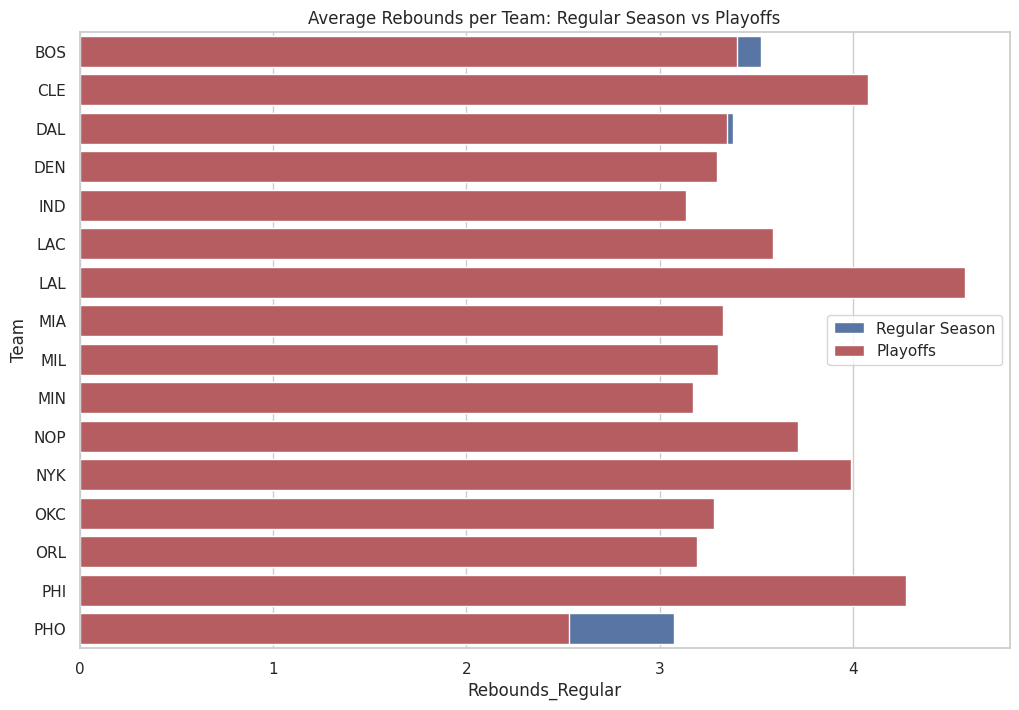


Team with the biggest increase in rebounds: LAL (1.84 increase)
Team with the biggest decrease in rebounds: PHO (-0.54 decrease)


In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
team_avg_rebounds = pd.merge(team_avg_stats_regular, team_avg_stats_playoffs, on='Team', suffixes=('_Regular', '_Playoffs'))

# plt avg rebounds for regular season and playoffs
sns.barplot(x='Rebounds_Regular', y='Team', data=team_avg_rebounds, color="b", label="Regular Season")
sns.barplot(x='Rebounds_Playoffs', y='Team', data=team_avg_rebounds, color="r", label="Playoffs")
plt.title('Average Rebounds per Team: Regular Season vs Playoffs')
plt.legend()
plt.show()

# calc the diff in rebounds per team between the regular season and playoffs
team_avg_rebounds['Rebound_Difference'] = team_avg_rebounds['Rebounds_Playoffs'] - team_avg_rebounds['Rebounds_Regular']

# find the team with the biggest increase in rebounds
team_biggest_increase = team_avg_rebounds.loc[team_avg_rebounds['Rebound_Difference'].idxmax()]
print(f"\nTeam with the biggest increase in rebounds: {team_biggest_increase['Team']} ({team_biggest_increase['Rebound_Difference']:.2f} increase)")

# find the team with the biggest decrease in rebounds
team_biggest_decrease = team_avg_rebounds.loc[team_avg_rebounds['Rebound_Difference'].idxmin()]
print(f"Team with the biggest decrease in rebounds: {team_biggest_decrease['Team']} ({team_biggest_decrease['Rebound_Difference']:.2f} decrease)")
